## Visualize Weather Information from Open Weather Map using visualization library such as Matplotlib, Seaborn, Plotly

In [30]:
import requests
import pandas as pd


W_BASE_URL = 'https://api.openweathermap.org/data/2.5/forecast'
W_API_KEY = ''  


# Function to get weather data
def get_weather_data(lat, lon):
    params = {
        'lat': lat,
        'lon': lon,
        'appid': W_API_KEY,
        'units': 'metric'
    }
    response = requests.get(W_BASE_URL, params=params)
    response.raise_for_status()
    return response.json()

# Function to load weather data
def load_weather_data(data):
    df = pd.DataFrame([{
        'date': entry['dt_txt'],
        'temperature': entry['main']['temp'],
        'humidity': entry['main']['humidity'],
        'wind_speed': entry['wind']['speed']
    } for entry in data['list']])
    df['date'] = pd.to_datetime(df['date'])
    return df


                  date  temperature  humidity  wind_speed
0  2024-12-28 21:00:00        21.62        57        3.92
1  2024-12-29 00:00:00        21.07        59        4.15
2  2024-12-29 03:00:00        21.67        67        5.65
3  2024-12-29 06:00:00        28.03        43        5.26
4  2024-12-29 09:00:00        30.48        31        4.20
5  2024-12-29 12:00:00        28.61        34        2.97
6  2024-12-29 15:00:00        24.31        39        3.59
7  2024-12-29 18:00:00        22.35        47        3.50
8  2024-12-29 21:00:00        21.12        52        3.09
9  2024-12-30 00:00:00        19.31        65        3.45
10 2024-12-30 03:00:00        22.25        61        4.30
11 2024-12-30 06:00:00        28.77        35        5.67
12 2024-12-30 09:00:00        30.86        25        3.91
13 2024-12-30 12:00:00        28.74        32        2.64
14 2024-12-30 15:00:00        24.47        42        3.39
15 2024-12-30 18:00:00        23.36        47        2.57
16 2024-12-30 

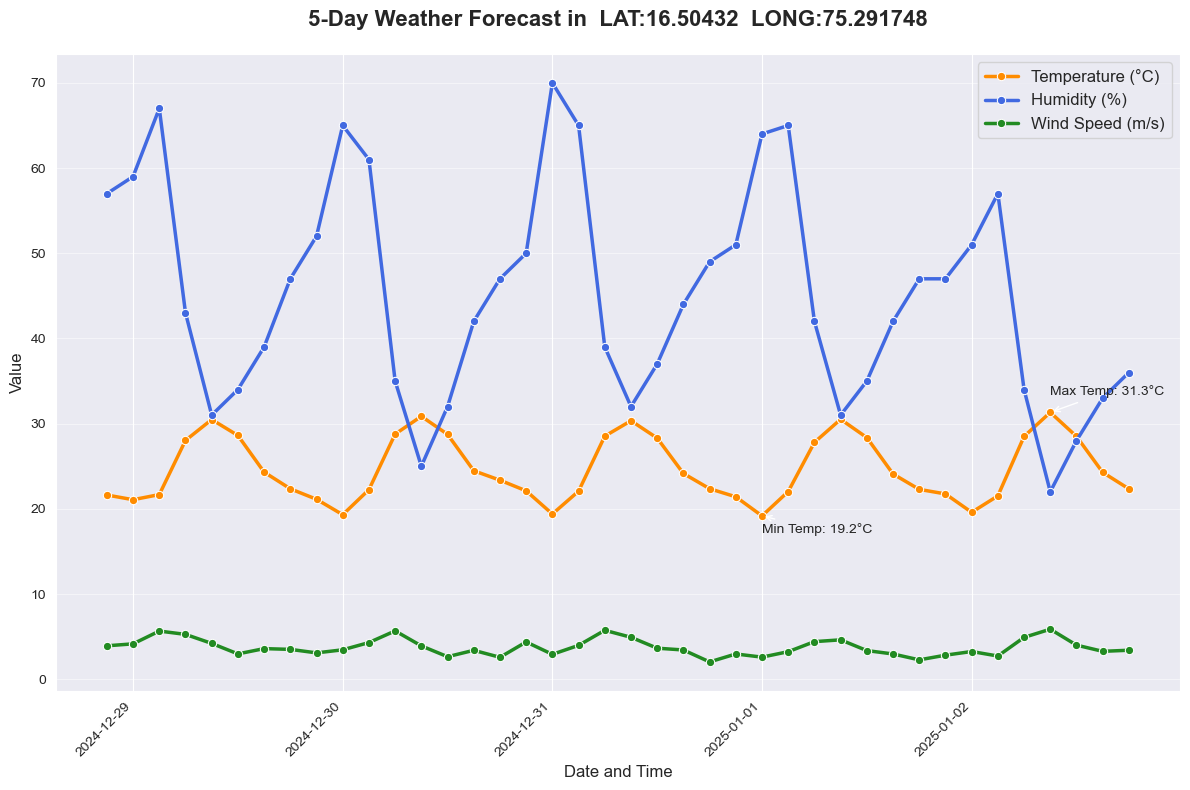

In [31]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def show_weather_data(df):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 8))  # Larger figure size
    sns.lineplot(x='date', y='temperature', data=df, label='Temperature (°C)', color='darkorange', linewidth=2.5, marker='o', markersize=6)
    sns.lineplot(x='date', y='humidity', data=df, label='Humidity (%)', color='royalblue', linewidth=2.5, marker='o', markersize=6)
    sns.lineplot(x='date', y='wind_speed', data=df, label='Wind Speed (m/s)', color='forestgreen', linewidth=2.5, marker='o', markersize=6)

    plt.title(f'5-Day Weather Forecast in  LAT:{latitude}  LONG:{longitude}', fontsize=16, fontweight='bold', pad=20) 
    plt.xlabel('Date and Time', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10) 
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    min_temp = df['temperature'].min()
    max_temp = df['temperature'].max()
    min_temp_date = df['date'][df['temperature'].idxmin()]
    max_temp_date = df['date'][df['temperature'].idxmax()]
    plt.annotate(f'Min Temp: {min_temp:.1f}°C', xy=(min_temp_date, min_temp), xytext=(min_temp_date, min_temp - 2),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10)
    plt.annotate(f'Max Temp: {max_temp:.1f}°C', xy=(max_temp_date, max_temp), xytext=(max_temp_date, max_temp + 2),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10)


    plt.show()

#MY NATIVE PLACE LATITUDE AND LONGITUDE https://www.latlong.net/ jamkhandi
latitude = 16.504320
longitude = 75.291748
weather_data = get_weather_data(latitude, longitude)
df = load_weather_data(weather_data)
print(df)
show_weather_data(df)